## The MemProtMD API
The MemProtMD API connects the MemProtMD database to applications such
as this site. The API is free to use for any application, provided data
obtained through it is properly attributed.

### General notes
We recommend using [Postman](https://www.getpostman.com/) to check that
the API methods shown here behave as expected. Postman can also output
code snippets in a number of languages for pipeline applications. Examples
in this guide use Python's Requests library.

### The MemProtMD Data Model

MemProtMD deals with a few different data types. It's worth understanding what these are before diving in:

#### Simulation

Each **simulation** is a simulation set up and run through the MemProtMD pipeline. The simulation has a Coarse-Grained Self-Assembley, Coarse-Grained Dynamics and Atomistic stage. Each simulation is linked to one **reference**.

#### Reference

Each **reference** is a reference to an accession in an external database, such as the Protein DataBank. It will have a unique identifier, which is the database abbreviation (e.g. PDB), the pipe (|) symbol and the accession code from that database. Record 1a0s from the Protein DataBank is therefore `PDB|1a0s`. Records typically also have a title, list of simulation IDs, `parent` reference (where the reference falls into a tree structure), `member_of` list (if it is a member of a broader database reference) and a `collection_members` list (the inverse of the `member_of` list).

## The MemProtMD JSON/MongoDB API

The MemProtMD JSON/MongoDB API aims to securely expose as much functionality as possible from the underlying MongoDB collections. Data is sent to the server in the body of an HTTP POST request as JSON and returned via HTTP response as JSON. The status of the response will be `200` for sucessful requests or `400` for unsuccessful requests. The reason for failure should be detailed in the JSON response.

There are three collections which can be queried using the JSON API - `simulations`, `refs` and `authors`.

First off, we'll import the Python requests library and set the root URI for the MemProtMD site.

In [1]:
import requests

In [2]:
MEMPROTMD_ROOT_URI = "http://memprotmd.bioch.ox.ac.uk/"

#### Bulk Operations

Often you might want to do grab a complete list of references or simulations from MemProtMD. These come with only the most commonly used fields so you may need to make additional requests (see below) to fill in details for other fields.

**All simulations** POST to http://memprotmd.bioch.ox.ac.uk/api/simulations/all with no parameters.

**All references** POST to http://memprotmd.bioch.ox.ac.uk/api/references/all/ with no parameters. You can optionally restrict this list to specific databases by adding the database name to the end of the URI, e.g. http://memprotmd.bioch.ox.ac.uk/api/references/all/Pfam for the Pfam database.

These Python examples will show only the first item from the returned list:

In [3]:
def get_all_memprotmd_simulations():
    return requests.post(MEMPROTMD_ROOT_URI + "api/simulations/all").json()

get_all_memprotmd_simulations()[0]

{'_id': '4jbw_default_dppc',
 'accession': '4jbw',
 'composition': {'DPPC': 100},
 'db': 'PDB',
 'sim_validate': {'n_frames': 4001}}

In [4]:
def get_all_memprotmd_references(database=""):
    return requests.post(MEMPROTMD_ROOT_URI + "api/references/all/" + database).json()

get_all_memprotmd_references("GO")[0]

{'_id': 'GO|GO:0035774',
 'accession': 'GO:0035774',
 'db': 'GO',
 'n_simulations': 2,
 'simulations': ['5u71_default_dppc', '5uak_default_dppc'],
 'subtitle': 'Biological process - Positive regulation of insulin secretion involved in cellular response to glucose stimulus',
 'title': 'Positive regulation of insulin secretion involved in cellular response to glucose stimulus'}

#### Full data for a reference or simulation

In this case the full database record is returned.

**Full data for a simulation** POST to http://memprotmd.bioch.ox.ac.uk/api/simulations/[sim_id]

**Full data for a reference** POST to http://memprotmd.bioch.ox.ac.uk/api/references/[database_id]/[sim_id]

The Python examples below show how you'd use this in practice:

In [5]:
def get_memprotmd_simulation(sim_id):
    return requests.post(
        MEMPROTMD_ROOT_URI 
        + "api/simulations/{sim_id}".format(
            sim_id = sim_id
        )).json()
get_memprotmd_simulation("1a0s_default_dppc")

{'_id': '1a0s_default_dppc',
 'accession': '1a0s',
 'chains': [{'chainID': 'P',
   'count': 1,
   'tm_alpha': 0,
   'tm_alpha_lipid': 0,
   'tm_alpha_protein': 0,
   'tm_alpha_solvent': 0,
   'tm_beta': 15,
   'tm_beta_lipid': 10,
   'tm_beta_protein': 0,
   'tm_beta_solvent': 5,
   'type': 'membrane spanning'},
  {'chainID': 'Q',
   'count': 1,
   'tm_alpha': 0,
   'tm_alpha_lipid': 0,
   'tm_alpha_protein': 0,
   'tm_alpha_solvent': 0,
   'tm_beta': 16,
   'tm_beta_lipid': 10,
   'tm_beta_protein': 1,
   'tm_beta_solvent': 5,
   'type': 'membrane spanning'},
  {'chainID': 'R',
   'count': 1,
   'tm_alpha': 0,
   'tm_alpha_lipid': 0,
   'tm_alpha_protein': 0,
   'tm_alpha_solvent': 0,
   'tm_beta': 16,
   'tm_beta_lipid': 10,
   'tm_beta_protein': 1,
   'tm_beta_solvent': 5,
   'type': 'membrane spanning'}],
 'composition': {'DPPC': 100},
 'db': 'PDB',
 'db_version': '2017-02-07T03:45:49',
 'images': {'bottom-cartoon': 'simulations/1a0s_default_dppc/images/bottom-cartoon.jpg',
  'bott

In [6]:
def get_memprotmd_reference(db, accession):
    return requests.post(
        MEMPROTMD_ROOT_URI 
        + "api/references/{db}/{accession}".format(
            db=db, accession=accession
        )).json()
get_memprotmd_reference("PDB", "4wit")

{'_id': 'PDB|4wit',
 'accession': '4wit',
 'all_authors': ['Lim, N.K.',
  'Duerst, A.',
  'Brunner, J.D.',
  'Schenck, S.',
  'Dutzler, R.'],
 'copyright': {'license': 'PDB',
  'origin': 'http://www.rcsb.org/pdb/explore/explore.do?structureId=4wit',
  'owner': 'Research Collaboration for Structural Biology, Lim, N.K., Duerst, A., Brunner, J.D., Schenck, S., Dutzler, R.',
  'terms': 'http://www.rcsb.org/pdb/static.do?p=general_information/about_pdb/pdb_advisory.html'},
 'db': 'PDB',
 'db_version': '2017-02-07T03:45:49',
 'entities': [{'chains': ['A', 'B'],
   'description': 'Predicted protein',
   'refs': [{'accession': 'C7Z7K1',
     'db': 'UniProt',
     'key': 'UniProt|C7Z7K1',
     'valid': True}],
   'type': 'protein'}],
 'experimental_method': 'X-RAY DIFFRACTION',
 'first_published': '2014-11-12',
 'href': 'http://www.rcsb.org/pdb/explore/explore.do?structureId=4wit',
 'in_collections': [{'accession': '1',
   'db': 'TCDB',
   'key': 'TCDB|1',
   'level': 1},
  {'accession': '1.A',

You can also pass in a list of references to get more detailed (although not full) data:

In [7]:
def get_memprotmd_reference_list(list_of_references):
    return requests.post(
        
        MEMPROTMD_ROOT_URI 
        + "api/references/from_list",
        
        json={"ids" : list_of_references}
        
    ).json()
get_memprotmd_reference_list(["PDB|1a0s", "PDB|1bcc"])

[{'_id': 'PDB|1a0s',
  'accession': '1a0s',
  'db': 'PDB',
  'experimental_method': 'X-RAY DIFFRACTION',
  'first_published': '1998-06-10',
  'n_simulations': 1,
  'resolution': '2.4',
  'subtitle': 'SUCROSE-SPECIFIC PORIN',
  'title': 'ScrY sucrose-specific porin'},
 {'_id': 'PDB|1bcc',
  'accession': '1bcc',
  'db': 'PDB',
  'experimental_method': 'X-RAY DIFFRACTION',
  'first_published': '1998-08-19',
  'n_simulations': 1,
  'resolution': '3.16',
  'subtitle': 'CYTOCHROME BC1 COMPLEX FROM CHICKEN',
  'title': 'Cytochrome bc<sub>1</sub>'}]

#### Searching MemProtMD

**Simple Search** POST to http://memprotmd.bioch.ox.ac.uk/api/search/simple with a JSON object in the POST body. The JSON object should contain a `searchTerm` (the string to search for) and may contain `numResults` - the number of results to send, `inDatabases` - a list of databases to look in and `sizeBias`, which controls how much the number of members a reference has should increase its relevance. Higher values will bias the search towards references with more members.

In [8]:
def memprotmd_text_search(
            search_term, 
            in_databases=["PDB", "mpm", "TCDB", "GO", "Pfam"], 
            size_bias=0.1,
            n_results=10):
    
    return requests.post(
        
        MEMPROTMD_ROOT_URI 
        + "api/search/simple",
        
        json={
            "searchTerm" : search_term,
            "inDatabases" : in_databases,
            "numResults" : n_results,
            "sizeBias" : size_bias
        }
        
    ).json()

memprotmd_text_search("gpcr", n_results=2, size_bias=10)

[{'_id': 'mpm|gpcrs',
  'accession': 'gpcrs',
  'db': 'mpm',
  'fullscore': 1663.3,
  'score': 3.3000000000000003,
  'size': 166,
  'title': 'G protein–coupled receptors (GPCRs)'},
 {'_id': 'Pfam|PF00001',
  'accession': 'PF00001',
  'db': 'Pfam',
  'fullscore': 1540.828947368421,
  'score': 0.8289473684210525,
  'size': 154,
  'subtitle': '7tm_1',
  'title': '7 transmembrane receptor (rhodopsin family)'}]

**Advanced Search** This is where things get fun (for MongoDB nerds like Tom). Advanced Search allows you to directly query the MongoDB dataset with a few restrictions:

- We only permit a few dollar operators to be used. If you'd like to use one we're currently blocking, get in touch and we'll consider adding it. At present we allow `$or`, `$and`, `$ne`, `$eq`, `$lt`, `$gt`, `$not`, `$nin`, `$in` and `$elemMatch`.

- You'll only be able to access the **refs**, **simulations** and **authors** collections. Sadly we've had to make the **shocking_secrets**, **banking_passwords** and **unpublished_structures** collections unavailable for the moment.

- **We're watching you.** Be kind to our server or you'll be blocked for a few minutes.

There are four parts to an advanced search. These should be familiar to anyone who's used MongoDB before:

- Name of the collection to query
- Query object
- Projection object
- Options object (e.g. sort, limit and skip)

As an example, let's find all the records with a chain containing seven transmembrane alpha helices, return only the id, chainID, number of alpha helical elements and number of lipid molecules, then sort by the number of lipid molecules (ascending) and show the first one.

In [9]:
def memprotmd_advanced_search(collection_name, query, projection, options):
    
    return requests.post(
        
        MEMPROTMD_ROOT_URI 
        + "api/search/advanced",
        
        json={
            "collectionName" : collection_name,
            "query" : query,
            "projection" : projection,
            "options" : options
        }
        
    ).json()

memprotmd_advanced_search(
    
    # Use the simulation collection
    "simulations",
    
    # Look in the chains array of each simulation and see if
    # any element in the array has the field tm_alpha equal to 7
    {
        "chains" : {
            "$elemMatch" : {
                "tm_alpha" : 7
            }
        }
    },
    
    # Projection - choose the fields to return. ID is returned
    # by default.
    {
        "chains.tm_alpha" : 1, 
        "chains.chainID" : 1, 
        "sim_validate.n_lipid_molecules" : 1
    },
    
    # Options - sort and then limit
    {
        "sort" : {
            "sim_validate.n_lipid_molecules" : 1
        }, 
        "limit" : 1
    }
)

[{'_id': '5b35_default_dppc',
  'chains': [{'chainID': 'A', 'tm_alpha': 7}],
  'sim_validate': {'n_lipid_molecules': 96}}]

Alternatively let's have an open query and projection which includes everything. I'm kind to servers and don't like being blocked so I only return the first one (you can definitely get away with occasionally pulling the entire dataset, but please limit your queries where possible!).

In [10]:
memprotmd_advanced_search(
    "refs",
    {},
    {},
    {"limit" : 1})

[{'_id': 'PDB|1a0s',
  'accession': '1a0s',
  'all_authors': ['Wacker, T.',
   'Kreutz, W.',
   'Welte, W.',
   'Diederichs, K.',
   'Benz, R.',
   'Schulein, K.',
   'Forst, D.'],
  'copyright': {'license': 'PDB',
   'origin': 'http://www.rcsb.org/pdb/explore/explore.do?structureId=1a0s',
   'owner': 'Research Collaboration for Structural Biology, Wacker, T., Welte, W., Diederichs, K., Forst, D.',
   'terms': 'http://www.rcsb.org/pdb/static.do?p=general_information/about_pdb/pdb_advisory.html'},
  'db': 'PDB',
  'db_version': '2017-02-07T03:45:49',
  'entities': [{'chains': ['P', 'Q', 'R'],
    'description': 'Sucrose porin',
    'refs': [{'accession': 'P22340',
      'db': 'UniProt',
      'key': 'UniProt|P22340',
      'valid': True}],
    'type': 'protein'}],
  'experimental_method': 'X-RAY DIFFRACTION',
  'first_published': '1998-06-10',
  'href': 'http://www.rcsb.org/pdb/explore/explore.do?structureId=1a0s',
  'in_collections': [{'accession': '1',
    'db': 'TCDB',
    'key': 'TC

In [11]:
memprotmd_advanced_search(
    "simulations",
    {},
    {},
    {"limit" : 1})

[{'_id': '4jbw_default_dppc',
  'accession': '4jbw',
  'chains': [{'chainID': 'A',
    'count': 1,
    'tm_alpha': 0,
    'tm_alpha_lipid': 0,
    'tm_alpha_protein': 0,
    'tm_alpha_solvent': 0,
    'tm_beta': 0,
    'tm_beta_lipid': 0,
    'tm_beta_protein': 0,
    'tm_beta_solvent': 0,
    'type': 'touching'},
   {'chainID': 'B',
    'count': 1,
    'tm_alpha': 0,
    'tm_alpha_lipid': 0,
    'tm_alpha_protein': 0,
    'tm_alpha_solvent': 0,
    'tm_beta': 0,
    'tm_beta_lipid': 0,
    'tm_beta_protein': 0,
    'tm_beta_solvent': 0,
    'type': 'touching'},
   {'chainID': 'F',
    'count': 1,
    'tm_alpha': 8,
    'tm_alpha_lipid': 8,
    'tm_alpha_protein': 0,
    'tm_alpha_solvent': 0,
    'tm_beta': 0,
    'tm_beta_lipid': 0,
    'tm_beta_protein': 0,
    'tm_beta_solvent': 0,
    'type': 'membrane spanning'},
   {'chainID': 'G',
    'count': 1,
    'tm_alpha': 6,
    'tm_alpha_lipid': 5,
    'tm_alpha_protein': 0,
    'tm_alpha_solvent': 1,
    'tm_beta': 0,
    'tm_beta_lipi

In [12]:
memprotmd_advanced_search(
    "authors",
    {},
    {},
    {"limit" : 1})

[{'_id': 'Rodriguez, F.',
  'author_on': ['PDB|2lzr', 'PDB|4b4a'],
  'copublished_with': [{'count': 2, 'id': 'Berks, B.C.'},
   {'count': 1, 'id': 'Palmer, T.'},
   {'count': 1, 'id': 'Sansom, M.S.'},
   {'count': 1, 'id': 'Tait, C.E.'},
   {'count': 1, 'id': 'Stansfeld, P.J.'},
   {'count': 1, 'id': 'Mcdowell, M.A.'},
   {'count': 1, 'id': 'Johnson, S.'},
   {'count': 1, 'id': 'Liu, S.'},
   {'count': 1, 'id': 'Timmel, C.R.'},
   {'count': 1, 'id': 'Krehenbrink, M.'},
   {'count': 1, 'id': 'Graham, J.E.'},
   {'count': 1, 'id': 'Schnell, J.R.'},
   {'count': 1, 'id': 'Lea, S.M.'},
   {'count': 1, 'id': 'Rouse, S.L.'},
   {'count': 1, 'id': 'Roversi, P.'},
   {'count': 1, 'id': 'Hogbom, M.'},
   {'count': 1, 'id': 'Harmer, J.'},
   {'count': 1, 'id': 'Jager, F.'},
   {'count': 1, 'id': 'Sansom, M.S.P.'},
   {'count': 1, 'id': 'De Riso, A.'},
   {'count': 1, 'id': 'Robinson, C.V.'},
   {'count': 1, 'id': 'Marcoux, J.'},
   {'count': 1, 'id': 'Tarry, M.J.'},
   {'count': 1, 'id': 'Rollau

If it didn't work our server will be as helpful as possible:

In [13]:
memprotmd_advanced_search(
    "authors",
    {"$doSomethingShady" : "secrets"},
    {},
    {"limit" : 1})

{'forbidden': '$doSomethingShady is not permitted.'}

### Data API

The Data API behaves like a normal filesystem (although we don't provide anything that acts like an index). Make an HTTP GET request and we'll send you the files. These examples use `matplotlib` and `pandas`.

In [14]:
% matplotlib inline
import pandas

Let's have some fun and download the postprocessed (annotated) contacts file for 1a0s_default_dppc, plot a histogram of temperature (&beta;) factors and a line graph of contacts along the amino acid sequence.

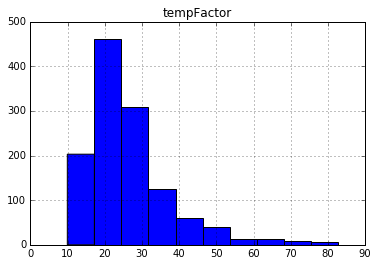

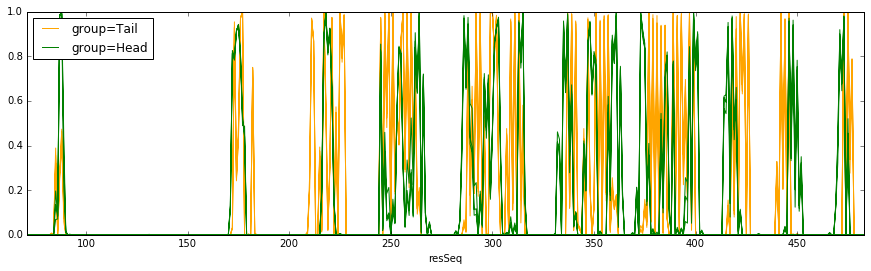

In [15]:
def get_resid_contacts(sim_id):
    return pandas.read_csv(
        MEMPROTMD_ROOT_URI 
        + "data/memprotmd/simulations/"
        + sim_id
        + "/files/contacts/by_resid_postprocess.csv"
    )
contacts = get_resid_contacts("1a0s_default_dppc")

contacts.hist("tempFactor")
contacts.plot(
    y=["group=Tail", "group=Head"], 
    x=["resSeq"], 
    color=["orange", "green"],
    figsize=[15,4])

You can also load structures from MemProtMD using mdtraj (or similar product):

In [16]:
import mdtraj as md
import nglview as nv

In [17]:
def mdtraj_load_memprotmd(sim_id, structure_name):
    traj = md.load_pdb( MEMPROTMD_ROOT_URI 
                + "data/memprotmd/simulations/"
                + sim_id
                + "/files/structures/"
                + structure_name
                + ".pdb")
    return traj

In [18]:
traj = mdtraj_load_memprotmd("1afo_default_dppc", "at")

In [19]:
protein_view = nv.show_mdtraj(traj.atom_slice(traj.topology.select("resid < 40")))
protein_view.add_ball_and_stick(opacity=0.5)
protein_view

In [20]:
cg_traj = mdtraj_load_memprotmd("1afo_default_dppc", "cg")

In [23]:
cg_view = nv.show_mdtraj(cg_traj)
cg_view.add_hyperball(radius=4, shrink=0.44, scale=0.6)
cg_view

You should now have most of the materials you need for some bioinformatics fun!